In [9]:
#%matplotlib ipympl

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib.widgets import Button, Slider

In [2]:
EMPTY, TREE, FIRE = 0, 1, 2
neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))

# Colors for visualization
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

In [3]:
forest_fraction = 0.65
p, f = 0, 0
nx, ny = 100, 100
X = np.zeros((ny, nx))

In [4]:
def iterate(X):
    """Iterate the forest according to the forest-fire rules."""
    X1 = np.zeros((ny, nx))
    for ix in range(1, nx-1):
        for iy in range(1, ny-1):
            if X[iy, ix] == EMPTY and np.random.random() <= p:
                X1[iy, ix] = TREE
            elif X[iy, ix] == TREE:
                X1[iy, ix] = TREE
                for dx, dy in neighbourhood:
                    if abs(dx) == abs(dy) and np.random.random() < 0.573:
                        continue
                    if X[iy+dy, ix+dx] == FIRE:
                        X1[iy, ix] = FIRE
                        break
                else:
                    if np.random.random() <= f:
                        X1[iy, ix] = FIRE
            elif X[iy, ix] == FIRE:
                X1[iy, ix] = EMPTY  # Fire burns out
    return X1


In [5]:
# Initialize the forest grid.
X  = np.zeros((ny, nx))

def init(forest_fraction):
    global X
    X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
    X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

In [6]:
def animate(i):
    """Update the animation frame."""
    global mat
    mat.set_data(animate.X)
    animate.X = iterate(animate.X)
    plt.draw()

In [7]:
def simulation(density):
    """Run the simulation."""
    global fig, ax, mat, anim
    fig, ax = plt.subplots()
    ax.axis('off')
    plt.title("Forest Fire Percolation Model")

    def advance(d):
        """Advance one step in the simulation."""
        global mat
        mat.set_data(animate.X)
        animate.X = iterate(animate.X)
        plt.draw()

    def stopAnim(d):
        anim.event_source.stop()

    def startAnim(d):
        anim.event_source.start()

    def initAnim(d):
        global X, mat
        init(density)
        animate.X = X.copy()
        started = False
        while not started:
            xs, ys = np.random.randint(1, nx-1), np.random.randint(1, ny-1)
            if X[ys, xs] == TREE:
                X[ys, xs] = FIRE
                started = True
        mat = ax.imshow(X, cmap=cmap, norm=norm)
        plt.draw()

    def updateDensity(val):
        nonlocal density
        density = sdensity.val

    axdensity = plt.axes([0.175, 0.05, 0.65, 0.03])
    sdensity = Slider(axdensity, 'Threshold', 0.0, 1.0, valinit=density)
    sdensity.on_changed(updateDensity)

    axnext = plt.axes([0.85, 0.15, 0.1, 0.075])
    axstart = plt.axes([0.85, 0.25, 0.1, 0.075])
    axstop = plt.axes([0.85, 0.35, 0.1, 0.075])
    axinit = plt.axes([0.85, 0.45, 0.1, 0.075])

    bnext = Button(axnext, 'Next')
    bnext.on_clicked(advance)
    bstart = Button(axstart, 'Resume')
    bstart.on_clicked(startAnim)
    bstop = Button(axstop, 'Stop')
    bstop.on_clicked(stopAnim)
    binit = Button(axinit, 'Init')
    binit.on_clicked(initAnim)

    initAnim(None)

    anim = animation.FuncAnimation(fig, animate, frames=None, cache_frame_data=False, interval=60, repeat=False)
    plt.show()

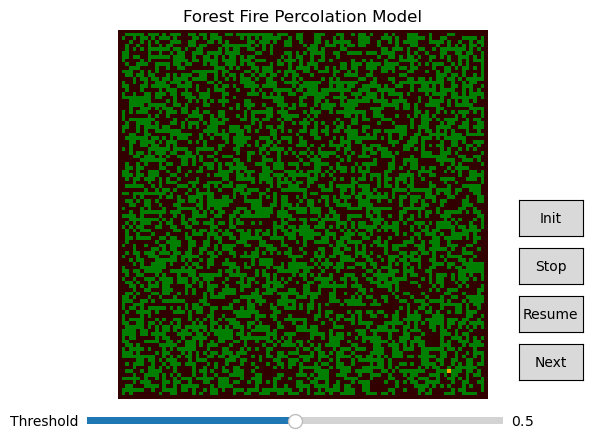

In [8]:
density=0.5
threshold =0.7
simulation(density)